# Exercise: Working with DateTime Variables
In this task, you will work with **date and time data** in Pandas. The data set used contains counts of cyclists at various time intervals and locations in Munich. The data set contains the following variables:
- `“datum”` = date
- `“uhrzeit_start”` = start of the measurement interval
- `“uhrzeit_ende”` = end of the measurement interval
- `“richtung_1”` = direction of travel 1 of the cyclist
- `“richtung_2”` = direction of travel 2 of the cyclist
- `“total”` = total number of cyclists in a time interval

In [6]:
import pandas as pd

df = pd.read_csv('rad_15min_condensed.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   datum          400000 non-null  object 
 1   uhrzeit_start  400000 non-null  object 
 2   uhrzeit_ende   400000 non-null  object 
 3   zaehlstelle    400000 non-null  object 
 4   richtung_1     399040 non-null  float64
 5   richtung_2     399040 non-null  float64
 6   gesamt         399040 non-null  float64
dtypes: float64(3), object(4)
memory usage: 21.4+ MB


## Task 1
**Creating Time Variables**
- Use the columns **`datum` (date)** and **`uhrzeit_start` (start time)** to create a new column called **`datetime_start`**.
- Similarly, combine **`datum` (date)** and **`uhrzeit_ende` (end time)** into a new **`datetime_end`** column.
- Make sure that the variables is in the correct **datetime format**.
- After successfully creating `datetime_start` and `datetime_end`, **remove the original columns** (`datum`, `uhrzeit_start`, and `uhrzeit_ende`) from the dataset.

In [7]:
from datetime import datetime, date, time, timedelta
df['datetime_start'] = pd.to_datetime(df['datum'] + ' ' + df['uhrzeit_start'])
df['datetime_end'] = pd.to_datetime(df['datum'] + ' ' + df['uhrzeit_ende'])

In [8]:
df = df.drop(['datum', 'uhrzeit_start','uhrzeit_ende'], axis=1)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   zaehlstelle     400000 non-null  object        
 1   richtung_1      399040 non-null  float64       
 2   richtung_2      399040 non-null  float64       
 3   gesamt          399040 non-null  float64       
 4   datetime_start  400000 non-null  datetime64[ns]
 5   datetime_end    400000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 18.3+ MB


## Task 2
In this task, you will analyze time-based trends in cycling data: determine **the peak hour for each counting station ("zaehlstelle")** based on the total number of cyclists recorded. Your result should be a dataframe showing:
 - The **counting station (`zaehlstelle`)**  
  - The **peak hour (`peakhour`)**  
  - The **total number of cyclists during that peak hour (`total_cyclists_peakhour`)**  



In [13]:
import pandas as pd
df['hour'] = df['datetime_start'].dt.hour

# Group by counting station and hour, sum totals
hourly_totals = df.groupby(['zaehlstelle', 'hour'])['gesamt'].sum().reset_index()

# Find peak hour for each station (using idxmax)
peak_hours = hourly_totals.loc[hourly_totals.groupby('zaehlstelle')['gesamt'].idxmax()]
# Rename columns for clarity
peak_hours = peak_hours.rename(columns={
    'hour': 'peakhour',
    'gesamt': 'total_cyclists_peakhour'
})



In [14]:
peak_hours

,zaehlstelle,peakhour,total_cyclists_peakhour
8,Arnulf,8,97928.0
42,Erhardt,18,314197.0
56,Hirsch,8,148568.0
79,Kreuther,7,15395.0
113,Margareten,17,160978.0
138,Olympia,18,166817.0


## Task 3
Analyze the dataset to determine whether the number of cyclists follows a **trend** or exhibits **seasonal patterns**.

1. **Trend Analysis**
Investigate if the cyclist count follows an increasing or decreasing trend.
- Compute a **7-day moving average** to smooth out short-term fluctuations.
- Plot both the **original data** and the **moving average**.

2. **Apply Differencing to Remove Trends**
- Compute the **first-order difference** of the data.
- Plot the differenced data and analyze whether the trend is removed.

3. **Compute ACF & PACF**
- **Autocorrelation Function (ACF):** Detect repeating cycles (e.g., daily or weekly patterns).
- **Partial Autocorrelation Function (PACF):** Identify significant lags that influence future values.

**Questions for Analysis**
- **Do you observe a clear trend in the cyclist count over time?**  
- **Is there a repeating pattern in the data?**  
- **What do the ACF/PACF plots suggest about seasonal effects?**  


In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   zaehlstelle     400000 non-null  object        
 1   richtung_1      399040 non-null  float64       
 2   richtung_2      399040 non-null  float64       
 3   gesamt          399040 non-null  float64       
 4   datetime_start  400000 non-null  datetime64[ns]
 5   datetime_end    400000 non-null  datetime64[ns]
 6   hour            400000 non-null  int32         
dtypes: datetime64[ns](2), float64(3), int32(1), object(1)
memory usage: 19.8+ MB


In [335]:
#df.set_index('datetime_start', inplace=True)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


df.set_index('datetime_start', inplace=True)



# Resample to daily count (assuming 'count' is the column with cyclist data)
daily_counts = df['gesamt'].resample('D').sum()


# Compute 7-day moving average
moving_avg = daily_counts.rolling(window=168, center = True).mean()


In [501]:
moving_avg.isna().sum()

np.int64(167)

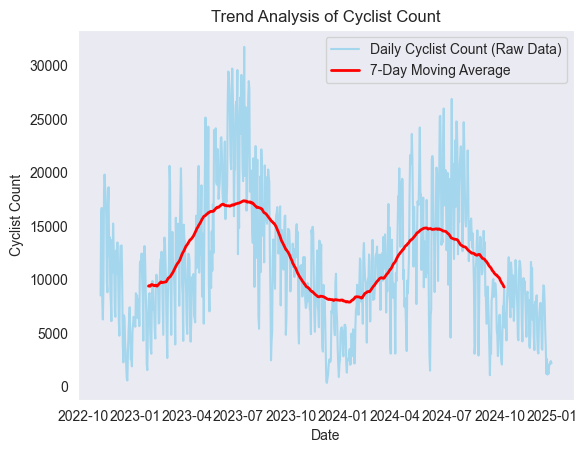

In [16]:

plt.plot(daily_counts, label='Daily Cyclist Count (Raw Data)', alpha=0.7, color='skyblue')
plt.plot(moving_avg, label='7-Day Moving Average', linewidth=2, color='red')
plt.xlabel('Date')
plt.ylabel('Cyclist Count')
plt.title('Trend Analysis of Cyclist Count')
plt.legend()
plt.grid()
plt.show()

In [477]:
print(df.shape)

(400000, 8)


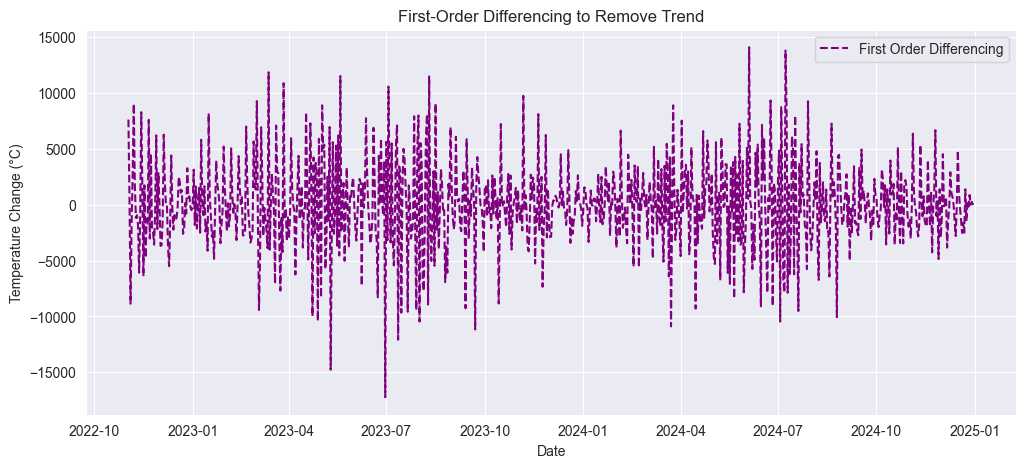

In [17]:
First_Difference = daily_counts.diff().dropna()

# Plot original data vs. differenced data
plt.figure(figsize=(12, 5))
#plt.plot(yearly_mean_temp["year"], yearly_mean_temp["mean_temperature"], label="Mean Temperature (Raw Data)", alpha=0.5)
plt.plot(First_Difference, label="First Order Differencing", color="purple", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Temperature Change (°C)")
plt.title("First-Order Differencing to Remove Trend")
plt.legend()
plt.show()


<Figure size 1200x600 with 0 Axes>

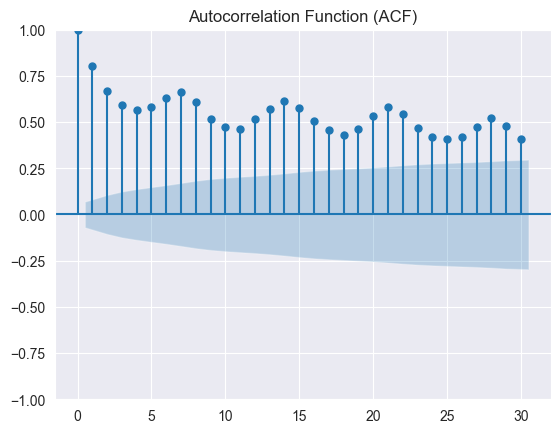

<Figure size 1200x600 with 0 Axes>

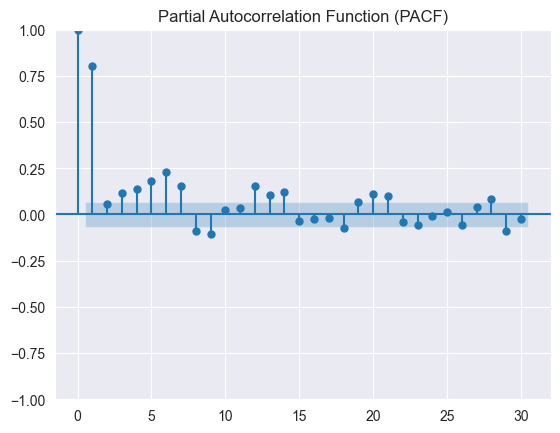

In [18]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot
plt.figure(figsize=(12, 6))
plot_acf(daily_counts, lags=30)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('lags')
plt.ylabel('autocorrelation')
plt.show()



In [ ]:
# PACF plot
plt.figure(figsize=(12, 6))
plot_pacf(daily_counts, lags=30)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('lags')
plt.ylabel('Partial correlation')
plt.show()

Doyouobserveacleartrendinthecyclistcountovertime?

We could see  an increase in the number of cyclist likely in the months of the April and August  and decrease in the number of cyclist in the months november to february by observing the first plot.

. Is there a repeating pattern in the data?

Yes we could see repeating pattern espacially in the warmer months an increase in the number of cyclist and decrease in the number of cyclist in colder months

What does ACF anf PACF plots suggest?

From the ACF plot:


We can see the positive autocorrelations are present at lags around multiples of 5-7 nad 12-15 suggesting the seasonal and annual effects. and also with the second plotfluctuations are more consistent after removing the trend and which also suggest the seasonal effects.

The slow decay of autocorrelations confirms that seasonality or trend is present in the data.

Also, the ACF doesn't immediately drop to zero, which is typical when a series is non-stationary (something you tried addressing with first-order differencing, as shown in your second plot).